In [16]:
import gpflow
import tikzplotlib
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

from experiments.zimbabwe_utility import read_data

## Load Data

In [20]:
data_path = "../../data/zimbabwe/zwe2016phia.geojson"
normalize = True
enu_coordinates = True

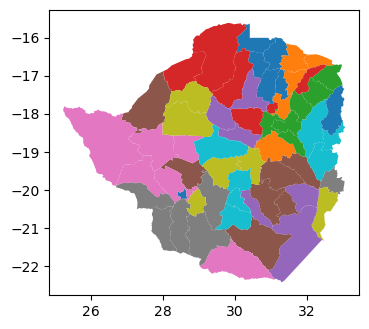

In [21]:
data = gpd.read_file(data_path)

fig, ax = plt.subplots(1, 1, figsize=(4,4))
data.plot(column='area_id', ax=ax, legend=False)

plt.show()

In [22]:
x, data_centroid = read_data(data_path, normalize=normalize, enu_coordinates=enu_coordinates)

/Users/vermap1/projects/PriorCVAE_JAX/experiments/zimbabwe_utility.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  data_frame["centroid"] = data_frame["geometry"].centroid
/Users/vermap1/projects/PriorCVAE_JAX/experiments/zimbabwe_utility.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  temp_centroids = data_frame["geometry"].centroid


In [23]:
## Adding estimate data
data_centroid["estimate"] = data["estimate"]

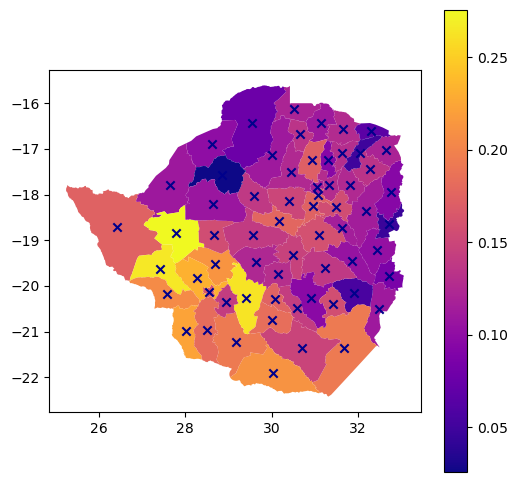

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
data_centroid.plot(column='estimate', ax=ax, legend=True, cmap='plasma')
data_centroid["centroid"].plot(ax=ax, color="DarkBlue", marker="x")
plt.show()

In [51]:
y_data = data_centroid["estimate"].to_numpy()[..., None]
y_data.shape

(63, 1)

In [52]:
geo_series = data_centroid["centroid"].values.to_numpy()

In [53]:
x_data = np.array([geom.coords[0] for geom in geo_series])

In [54]:
x_data.shape

(63, 2)

## GPR

In [68]:
model = gpflow.models.GPR(
    (x_data, y_data),
    kernel=gpflow.kernels.Matern52(lengthscales=0.2, variance=0.1), noise_variance=1e-5
)

In [69]:
opt = gpflow.optimizers.Scipy()
opt.minimize(model.training_loss, model.trainable_variables)

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: -110.1818372198068
        x: [ 4.350e+00 -4.260e+00 -6.780e+00]
      nit: 26
      jac: [-4.377e-07  6.023e-06 -1.035e-05]
     nfev: 36
     njev: 36
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>

In [70]:
model.kernel

name,class,transform,prior,trainable,shape,dtype,value
Matern52.variance,Parameter,Softplus,,True,(),float64,0.01402
Matern52.lengthscales,Parameter,Softplus,,True,(),float64,4.36311
